In [1]:
import pandas as pd

import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# to read file
import requests
from urllib.parse import urlencode

# to hide warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# links to all dataFrames
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key_clients = 'https://disk.yandex.ru/d/FUi5uSd6BfG_ig'
public_key_orders = 'https://disk.yandex.ru/d/t9Li4JOfgxuUrg'
public_key_items = 'https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw'

In [3]:
# use try-except construction to avoid errors during reading
# read clinets dataFrame
try:
    final_url = base_url + urlencode(dict(public_key=public_key_clients))
    response = requests.get(final_url)
    download_url = response.json()['href']

    download_response = requests.get(download_url)
    clients = pd.read_csv(download_url)
except KeyError:
    print('clients dataframe reading error')

In [4]:
# read orders dataFrame
try:
    final_url = base_url + urlencode(dict(public_key=public_key_orders))
    response = requests.get(final_url)
    download_url = response.json()['href']

    download_response = requests.get(download_url)
    orders = pd.read_csv(download_url)
except KeyError:
    print('orders dataframe reading error')

In [5]:
# read items dataFrame
try:
    final_url = base_url + urlencode(dict(public_key=public_key_items))
    response = requests.get(final_url)
    download_url = response.json()['href']

    download_response = requests.get(download_url)
    items = pd.read_csv(download_url)
except KeyError:
    print('items dataframe reading error')

***
__Подготовим данные для работы. Проверим пропущенные значения, типы данных, размер, наличие повторений__

In [6]:
# check size
clients.shape

(99441, 5)

In [7]:
# check data types and null values
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
# check dublicates
clients.duplicated().sum()

0

In [9]:
# check head
clients.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP


В clients нет пропущенных значений, заголовки названы однотипно (не нуждаются в переименовании), типы данных соответствуют содержанию

Повторим подготовку для items

In [10]:
# check size
items.shape

(112650, 7)

In [11]:
# check check size and null values
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [12]:
# convert data types columns to datetime format
items.shipping_limit_date = pd.to_datetime(items.shipping_limit_date)

In [13]:
# check dublicates
items.duplicated().sum()

0

In [14]:
# check head
items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

В items также нет пропущенных значений, заголовки названы однотипны (не нуждаются в переименовании). Исправлен тип данных shipping_limit_date 

Повторим подготовку для orders

In [15]:
# check size
orders.shape

(99441, 8)

In [16]:
# check check size and null values
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [17]:
# check missing values
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Мы видим, что в таблице присутствуют пропущенные значения у дат. Возможно, даты не проставлены у заказов, которые были отменены (на разных этапах), либо имели статус unavailable. Можно исследовать, каким статусам соответствуют пропущенные даты. В случае статуса unavailable можно предположить, что с этими заказами ничего не происходит.

Проверим сначала заказы со статусом unavailable

In [18]:
# check head
items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  
0 2017-09-19 09:45:35   58.90          13.29  
1 2017-05-03 11:05:13  239.90          19.93  
2 2018-01-18 14:48:30  199.00          17.87  
3 2018-08-15 10:10:18   12.99          12.79  
4 2017-02-13 13:57:51  199.90          18.14

In [19]:
# check unavailable orders
orders.loc[orders.order_status == 'unavailable'].shape

(609, 8)

In [20]:
orders \
    .loc[orders.order_status == 'unavailable'] \
        [['order_status', 
          'order_approved_at',
          'order_delivered_carrier_date',
          'order_delivered_customer_date', 
          'order_estimated_delivery_date']] \
    .isna().sum()

order_status                       0
order_approved_at                  0
order_delivered_carrier_date     609
order_delivered_customer_date    609
order_estimated_delivery_date      0
dtype: int64

Видно, что у всех заказов со статусом unavailable есть order_approved_at и order_estimated_delivery_date. Вероятно, order_estimated_delivery_date присваивается в момент создания заказа, и она есть у всех заказов вне зависимости от статуса.  

Для всех заказов со статусом unavailable не указаны order_delivered_carrier_date и order_delivered_customer_date. Это в некоторой степени подтверждает, что эти заказы не обрабатываются

Теперь рассмотрим, какими статусами обладают заказы, у которых пропущены другие даты

In [21]:
# check statuses of orders with missing order_approved_date
orders.loc[(orders.order_approved_at.isna() == True) & orders.order_status != 'unavailable'].order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [22]:
# check statuses of orders with missing order_delivered_carrier_date
orders.loc[(orders.order_approved_at.isna() == True) & orders.order_status != 'unavailable'].order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [23]:
# check statuses of orders with missing order_delivered_customer_date
orders.loc[(orders.order_approved_at.isna() == True) & orders.order_status != 'unavailable'].order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

Видно, что для всех пропущенных дат нет очевидной связи со статусом canceled (встречаются и другие статусы).

Проверим, сколько примерно заказов, у которых статус не canceled, при этом есть пропуски в датах.

In [24]:
orders.loc[orders.order_status != 'canceled'].isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  19
order_delivered_carrier_date     1233
order_delivered_customer_date    2346
order_estimated_delivery_date       0
dtype: int64

In [25]:
orders.shape

(99441, 8)

Итого: в orders есть заказы со статусом, отличным от canceled. Количество таких заказов меньше до 3500 штук.

Я предполагаю, что можно считать нормальной ситуацию, когда в датафрейме у заказа статус canceled, при этом одна из интересующих нас дат могла быть не заполнена (заказ мог быть отменен на любом этапе). При этом, когда заказ не отменен, пропуски в датах свидетельствуют либо о незавершенном процессе покупки, либо об ошибке в сборе данных. 

Будем принимать во внимание всю полученную информацию при дальнейшей анализе.

In [26]:
# check check size and null values
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [27]:
# convert all data fields to datetime format
orders[['order_purchase_timestamp', 
        'order_approved_at', 
        'order_delivered_carrier_date', 
        'order_delivered_customer_date', 
        'order_estimated_delivery_date']] = orders[['order_purchase_timestamp', 
                                                    'order_approved_at', 
                                                    'order_delivered_carrier_date', 
                                                    'order_delivered_customer_date', 
                                                    'order_estimated_delivery_date']].apply(pd.to_datetime)

In [28]:
# one сolumn shoud be renamed
orders = orders.rename(columns={'order_purchase_timestamp': 'order_purchase_date'})

Итого в orders был исправлен тип данных даты. Заголовки названы однотипно, но в одной колонке было убрано лишнее слово, остальные колонки не нуждаются в переименовании.

На этом подготовка данных завершена.

***
__Вопрос 1: сколько у нас пользователей, которые совершили покупку только один раз?__

Для ответа на этот вопрос рассмотрим уникальных покальзователей, совершивших покупки. Объединим orders (чтобы определить заказы) и clients (чтобы получить идентификаторы).

Под покупкой будем понимать заказ, который имеет статус отличный от canceled (он отменен), created (товары только добавлены в корзину), unavailable (товары недоступны по каким-либо причинам)

In [29]:
# merge clients and orders by customer_id 
orders_by_clients = orders.merge(clients[['customer_id','customer_unique_id']], on='customer_id')

In [30]:
# find all users with all order statuses, excluding canceled, created, unavailable
skipped_statuses = ['canceled', 'created', 'unavailable']

# group by user_ID and count number of orders
orders_by_clients = orders_by_clients[~orders_by_clients.order_status.isin(skipped_statuses)] \
                            .groupby('customer_unique_id', as_index=False) \
                            .agg({'order_id': 'count'}) \
                            .rename(columns={'order_id': 'orders_number'})
orders_by_clients.head()

customer_unique_id  orders_number
0  0000366f3b9a7992bf8c76cfdf3221e2              1
1  0000b849f77a49e4a4ce2b2a4ca5be3f              1
2  0000f46a3911fa3c0805444483337064              1
3  0000f6ccb0745a6a4b88665a16c9f078              1
4  0004aac84e0df4da2b147fca70cf8255              1

In [31]:
# leave only users with a single order
orders_by_clients[orders_by_clients.orders_number == 1].customer_unique_id.count()

92099

In [32]:
# find total number of unique customers
orders_by_clients.customer_unique_id.nunique()

94986

Можно увидеть, что подавляющее число пользователей совершали покупку только один заказ

__Ответ 1: Число пользователей, совершивших только одну покупку равно 92099__

***
__Вопрос 2: сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?__

Данные для ответа на этот вопрос будут взяты из orders. Под недоставленным заказом я буду понимать любой заказ, имеющий статус canceled или unavailiable.

Причину, из-за которой заказ не был доставлен, можно отследить из хронологии дат:
- order_purchase_date
- order_approved_at 
- order_delivered_carrier_date
- order_delivered_customer_date

Я предполагаю, что любая из рассматриваемых дат присваивается в начале этапа, поскольку, например, в датафрейме, есть отмененные заказы, у которых указаны все даты, включая order_delivered_customer_date (самая последняя по хронологии). Вероятно, этот случай соответсвует возврату товара.

In [33]:
orders[
    (orders.order_status == 'canceled') & \
    (~orders.order_approved_at.isna()) & \
    (~orders.order_delivered_carrier_date.isna()) & \
    (~orders.order_delivered_customer_date.isna())] \
    .order_delivered_customer_date

2921    2018-03-21 22:03:51
8791    2016-10-16 14:36:59
58266   2016-10-14 15:07:11
59332   2016-10-19 18:47:43
92636   2016-11-08 10:58:34
94399   2016-11-09 14:53:50
Name: order_delivered_customer_date, dtype: datetime64[ns]

Таким образом, _причину недоставки заказа будем определеять по последней заполненной дате из хронологического порядка_.

Соберем датафрейм недоставленных заказов и добавим в него два вспомогательных столбца - причина отмены (этап, на котором произошла отмена) и дата отмены. Также добавим вспомогательный столбец, содержащий месяц и год покупки

In [34]:
# create new dataframe
undelivered_orders = orders[(orders.order_status == 'canceled') | (orders.order_status == 'unavailable')]

In [35]:
# create column with canceled date (the maximum date)
undelivered_orders['canceled_date'] = \
                                    undelivered_orders[[ \
                                                     'order_purchase_date',
                                                     'order_approved_at', 
                                                     'order_delivered_carrier_date', 
                                                     'order_delivered_customer_date']] \
                                    .max(axis=1)

# create column with canceled reason (the title of the column with the maximum date)
undelivered_orders['canceled_reason'] = \
                                    undelivered_orders[[ \
                                                     'order_purchase_date',
                                                     'order_approved_at', 
                                                     'order_delivered_carrier_date', 
                                                     'order_delivered_customer_date']] \
                                    .idxmax(axis="columns")


C:\Users\avtut\AppData\Local\Temp\ipykernel_17524\709385059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  undelivered_orders['canceled_date'] = \
C:\Users\avtut\AppData\Local\Temp\ipykernel_17524\709385059.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  undelivered_orders['canceled_reason'] = \


In [36]:
# function to translate the ex-title of a column into a more understandable form
def reason_title(original_title):
    titles = dict({'order_approved_at': 'approval',
                  'order_delivered_carrier_date': 'carrier',
                   'order_purchase_date': 'purchase',
                   'order_delivered_customer_date' : 'delivery'
                  })
    return f'{titles[original_title]}_problem'

In [37]:
# apply rename function cancellation
undelivered_orders['canceled_reason'] = undelivered_orders.canceled_reason.apply(reason_title)

C:\Users\avtut\AppData\Local\Temp\ipykernel_17524\2687711334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  undelivered_orders['canceled_reason'] = undelivered_orders.canceled_reason.apply(reason_title)


In [38]:
# create column with year and month of 
undelivered_orders['year_month_cancellation'] = undelivered_orders.canceled_date.dt.strftime('%Y-%m')

C:\Users\avtut\AppData\Local\Temp\ipykernel_17524\4135066108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  undelivered_orders['year_month_cancellation'] = undelivered_orders.canceled_date.dt.strftime('%Y-%m')


In [39]:
# calculate number of orders every month in each reason group
undelivered_orders_per_reason_and_month = \
        undelivered_orders.groupby(['canceled_reason', 'year_month_cancellation'], as_index=False) \
        .agg({'order_id': 'count'}) \
        .rename(columns={'order_id': 'orders_number'})

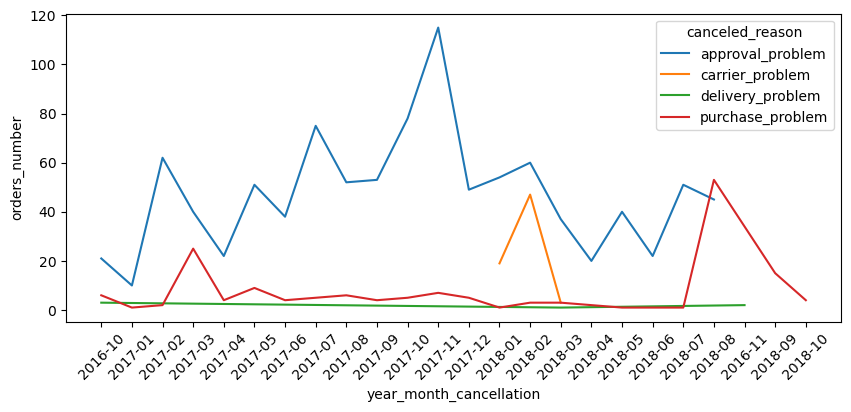

In [40]:
# plot canceled orders per month
fig, ax = plt.subplots(figsize=(10, 4))
plt.xticks(rotation=45)
sns.lineplot(
             data=undelivered_orders_per_reason_and_month, 
             x='year_month_cancellation', 
             y='orders_number', 
             hue='canceled_reason'
            );

In [41]:
# calculate orders by reason group
undelivered_orders_per_reason_and_month \
            .groupby('canceled_reason', as_index=False) \
            .mean() \
            .sort_values('orders_number', ascending=False)

canceled_reason  orders_number
0  approval_problem      47.380952
1   carrier_problem      23.000000
3  purchase_problem       7.809524
2  delivery_problem       2.000000

Из полученных результатов видно, что наиболее частой причины того, что заказ не доставляется, являются проблемы на этапе подтверждения заказа. Также из полученных графиков можно увидеть, что был 1 месяц, когда по этой причине наблюдалось рекордное количество отмен заказов (на 30% больше). Кроме того, можно заключить, что проблемы с посредниками были временные, поскольку все такие недоставленные заказы приходятся на конец 2017 и начало 2018 года.

__Ответ 2: в среднем в месяц не доставляют 47 заказов из-за проблем с подтверждение, 23 заказа по причине проблем с посредниками, 7.8 заказа - сразу после покупки (возможно, технические сбои или множество причин со стороны пользователя), 2 заказа - в процессе доставки__ 

***
__Вопрос 3: По каждому товару определить, в какой день недели товар чаще всего покупается__

В данном вопросе под покупкой можно понимать не совсем то, что было в п.1, поскольку, скорее всего, для нас интерес представляет, как связан день недели оформления заказа с конкретным товаром, а не факт того, что заказ был доставлен пользователю. Поэтому здесь можно рассматривать все заказы.

Для того, чтобы выяснить день покупки товара, требуется объединить таблицы items и orders по колонке order_id.

В датафреймах нет никаких сведений о том, сколько единиц кажого товара куплено. Можно предположить, что каждая строка в датафрейме соотвествует 1 заказанной единице товара. Проверим этом, выполнив группировку по заказу и по продукту, и посчитав количество их встречаемости

In [42]:
# collect a cutted dataframe, which store information about the quantity of each product in each order
cutted_items = items.groupby(['order_id', 'product_id'], as_index=False)\
            .agg({'seller_id': 'count'}) \
            .rename(columns={'seller_id': 'count'}) \
            .sort_values('count', ascending=False)
cutted_items.head()

order_id                        product_id  \
10850  1b15974a0141d54e36626dca3fdc731a  ee3d532c8a438679776d222e997606b3   
68186  ab14fdcfbe524636d65ee38360e22ce8  9571759451b1d780ee7c15012ea109d4   
26550  428a2f660dc84138d969ccd69a0ab6d5  89b190a046022486c635022524a974a8   
63242  9ef13efd6949e4573a18964dd1bbe7f5  37eb69aca8718e843d897aa7b82f462d   
46268  73c8ab38f07dc94389065f7eba4f297a  422879e10f46682990de24d770e7f83d   

       count  
10850     20  
68186     20  
26550     15  
63242     15  
46268     14

Таким образом, каждая строка оригинального датафрейма соответствовала одной единице товара. 

Получим из orders только дату оформления заказа и номер заказа. Сохраним в отдельный датафрейм для дальнейшего объединения с информацией о товарах. Также сразу вычислим для каждой даты покупки соответвутствующей ей день недели

In [43]:
cutted_orders = orders[['order_id', 'order_purchase_date']].reset_index(drop=True)
cutted_orders['week_day'] = cutted_orders.order_purchase_date.dt.day_of_week

In [44]:
items_by_orders = cutted_items.merge(cutted_orders, on='order_id', how='inner')
items_by_orders.head()

order_id                        product_id  count  \
0  1b15974a0141d54e36626dca3fdc731a  ee3d532c8a438679776d222e997606b3     20   
1  ab14fdcfbe524636d65ee38360e22ce8  9571759451b1d780ee7c15012ea109d4     20   
2  428a2f660dc84138d969ccd69a0ab6d5  89b190a046022486c635022524a974a8     15   
3  9ef13efd6949e4573a18964dd1bbe7f5  37eb69aca8718e843d897aa7b82f462d     15   
4  73c8ab38f07dc94389065f7eba4f297a  422879e10f46682990de24d770e7f83d     14   

  order_purchase_date  week_day  
0 2018-02-22 15:30:41         3  
1 2017-08-23 09:22:34         2  
2 2017-11-23 20:30:52         3  
3 2017-01-30 21:44:49         0  
4 2017-12-13 14:21:15         2

Теперь ответим на вопрос из задания: в какой день недели чаще всего покупается каждый товар

In [45]:
# count purchases by days
items_by_days = items_by_orders \
                .groupby(['product_id', 'week_day'], as_index=False) \
                .agg({'count': 'sum'}) \
                .rename(columns={'count': 'number_of_orders'})

# get day with maximum number
items_max_day = items_by_days \
            .pivot(index='product_id', columns='week_day', values='number_of_orders') \
            .fillna(0) \
            .idxmax(axis="columns") \
            .reset_index()

# rename last column
items_max_day = items_max_day.rename(columns={items_max_day.columns[1]: 'day'})
items_max_day.head()

product_id  day
0  00066f42aeeb9f3007548bb9d3f33c38    6
1  00088930e925c41fd95ebfe695fd2655    1
2  0009406fd7479715e4bef61dd91f2462    3
3  000b8f95fcb9e0096488278317764d19    2
4  000d9be29b5207b54e86aa1b1ac54872    1

Можно визуализировать, в какие дни и как покупаются товары

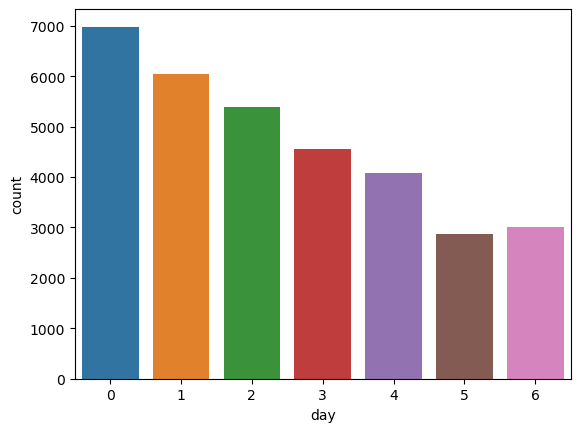

In [46]:
sns.countplot(x=items_max_day["day"]);

Чаще всего товары покупают в 0 день недели (Sunday)

__Ответ 3: наиболее популярный день покупки каждого товара содержится в датарейме items_max_day__

***
__Вопрос 4: Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?__

В данном пункте под покупкой будем понимать то же, что и в п.1: заказ, который имеет статус отличный от canceled (он отменен), created (товары только добавлены в корзину), unavailable (товары недоступны по каким-либо причинам). Опять объедним таблицы пользователей и заказов, а также для фильтра статуса воспользуемся списком skipped_statuses, который был сформирован также в 1 пункте.

Затем для каждой из дат покупки узнаем месяц и год, когда была совершена покупка, а также номер недели в году и количество недель в месяце. Комбинация этих полей позволит правильно сгруппировать заказы по неделям и месяцам 

In [48]:
# save required data
mean_by_week_orders = orders.loc[~orders.order_status.isin(skipped_statuses)] \
                        [['customer_id', 'order_id', 'order_purchase_date']] \
                        .merge(clients[['customer_id','customer_unique_id']], on='customer_id')

In [49]:
# get month and year
mean_by_week_orders['year_month_purchase'] = mean_by_week_orders.order_purchase_date.dt.strftime('%Y-%m')

In [50]:
# get number of week in year
mean_by_week_orders['week_in_year'] = mean_by_week_orders['order_purchase_date'].dt.isocalendar().week

In [51]:
# make combination for further grouping
mean_by_week_orders['week_in_month'] = \
            mean_by_week_orders.year_month_purchase + ' ' + mean_by_week_orders.week_in_year.apply(str)

In [52]:
# add a number of weeks in each month
mean_by_week_orders['week_number'] = (mean_by_week_orders.order_purchase_date.dt.days_in_month / 7).round(3)
mean_by_week_orders.head()

customer_id                          order_id  \
0  9ef432eb6251297304e76186b10a928d  e481f51cbdc54678b7cc49136f2d6af7   
1  b0830fb4747a6c6d20dea0b8c802d7ef  53cdb2fc8bc7dce0b6741e2150273451   
2  41ce2a54c0b03bf3443c3d931a367089  47770eb9100c2d0c44946d9cf07ec65d   
3  f88197465ea7920adcdbec7375364d82  949d5b44dbf5de918fe9c16f97b45f8a   
4  8ab97904e6daea8866dbdbc4fb7aad2c  ad21c59c0840e6cb83a9ceb5573f8159   

  order_purchase_date                customer_unique_id year_month_purchase  \
0 2017-10-02 10:56:33  7c396fd4830fd04220f754e42b4e5bff             2017-10   
1 2018-07-24 20:41:37  af07308b275d755c9edb36a90c618231             2018-07   
2 2018-08-08 08:38:49  3a653a41f6f9fc3d2a113cf8398680e8             2018-08   
3 2017-11-18 19:28:06  7c142cf63193a1473d2e66489a9ae977             2017-11   
4 2018-02-13 21:18:39  72632f0f9dd73dfee390c9b22eb56dd6             2018-02   

   week_in_year week_in_month  week_number  
0            40    2017-10 40        4.429  
1            30    2018-07 30        4.429  
2            32    2018-08 32        4.429  
3            46    2017-11 46        4.286  
4             7     2018-02 7        4.000

Посчитаем количество заказов для каждого пользователя в месяц в конкретную неделю

In [53]:
# group by customer_id, year_month_purchase, week_in_month
mean_by_week_orders = mean_by_week_orders \
                        .groupby(['customer_unique_id', 'year_month_purchase', 'week_in_month', 'week_number'], as_index=False) \
                        .agg({'order_id': 'count'}) \
                        .rename(columns={'order_id': 'orders'})
mean_by_week_orders.head()

customer_unique_id year_month_purchase week_in_month  \
0  0000366f3b9a7992bf8c76cfdf3221e2             2018-05    2018-05 19   
1  0000b849f77a49e4a4ce2b2a4ca5be3f             2018-05    2018-05 19   
2  0000f46a3911fa3c0805444483337064             2017-03    2017-03 10   
3  0000f6ccb0745a6a4b88665a16c9f078             2017-10    2017-10 41   
4  0004aac84e0df4da2b147fca70cf8255             2017-11    2017-11 46   

   week_number  orders  
0        4.429       1  
1        4.429       1  
2        4.429       1  
3        4.429       1  
4        4.286       1

Столбец week_in_month позволил нам отнести заказы из недель, которые принаделжат одовременно к двум разным месяцам. Теперь можно выполнить группировку с суммированием числа заказов только по пользователю и месяцу. После группировки поделим полученное число на количество недель

In [54]:
mean_by_week_orders = mean_by_week_orders \
            .groupby(['customer_unique_id', 'year_month_purchase', 'week_number'], as_index=False) \
            .agg({'orders': 'sum'})
mean_by_week_orders['mean_order_number'] = (mean_by_week_orders.orders / mean_by_week_orders.week_number).round(2)
mean_by_week_orders.head()

customer_unique_id year_month_purchase  week_number  orders  \
0  0000366f3b9a7992bf8c76cfdf3221e2             2018-05        4.429       1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f             2018-05        4.429       1   
2  0000f46a3911fa3c0805444483337064             2017-03        4.429       1   
3  0000f6ccb0745a6a4b88665a16c9f078             2017-10        4.429       1   
4  0004aac84e0df4da2b147fca70cf8255             2017-11        4.286       1   

   mean_order_number  
0               0.23  
1               0.23  
2               0.23  
3               0.23  
4               0.23

Удалим из mean_by_week_orders все вспомогательные столбцы

In [55]:
mean_by_week_orders = mean_by_week_orders.drop(columns=['week_number', 'orders'])
mean_by_week_orders.head()

customer_unique_id year_month_purchase  mean_order_number
0  0000366f3b9a7992bf8c76cfdf3221e2             2018-05               0.23
1  0000b849f77a49e4a4ce2b2a4ca5be3f             2018-05               0.23
2  0000f46a3911fa3c0805444483337064             2017-03               0.23
3  0000f6ccb0745a6a4b88665a16c9f078             2017-10               0.23
4  0004aac84e0df4da2b147fca70cf8255             2017-11               0.23

__Ответ 4: среднее количество покупок каждого пользователя в неделю по месяцам содержится в mean_by_week_orders__

***
__Вопрос 5: Проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц__

Для ответа на данный вопрос снова возьмем данные из orders. Под retention будем понимать повторное оформление заказа.

В задании не сказано, о каком именно годе идет речь, но данные за полный год у нас есть только для 2017, поэтому будем рассматривать именно его.

Также будем рассматривать только пользователей, который совершили покупку (как в п.1). Для этого возьмем всех заказы со статусами, отличными от canceled, unavaliable и created, и соедним эту таблицу с clients, где содержатся уникальные id пользователей.

Чтобы упростить пониманием, к какому месяцу относится заказ, создадим дополнительную колонку purchase_month

In [56]:
# get delivered orders with only needed columns 
orders_cohort = orders[['order_id', 'customer_id', 'order_status', 'order_purchase_date']] \
                .merge(clients[['customer_id','customer_unique_id']], on='customer_id')

In [57]:
# leave only orders in 2017
orders_cohort = orders_cohort.loc[orders_cohort.order_purchase_date.dt.year == 2017]

In [58]:
# leave only completed orders
orders_cohort = orders_cohort.loc[~orders.order_status.isin(skipped_statuses)]

In [59]:
# function to get month
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [60]:
# create purchase_month column
orders_cohort['purchase_month'] = orders_cohort.order_purchase_date.apply(get_month)
orders_cohort.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
5  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   

  order_status order_purchase_date                customer_unique_id  \
0    delivered 2017-10-02 10:56:33  7c396fd4830fd04220f754e42b4e5bff   
3    delivered 2017-11-18 19:28:06  7c142cf63193a1473d2e66489a9ae977   
5    delivered 2017-07-09 21:57:05  80bb27c7c16e8f973207a5086ab329e2   
6     invoiced 2017-04-11 12:22:08  36edbb3fb164b1f16485364b6fb04c73   
7    delivered 2017-05-16 13:10:30  932afa1e708222e5821dac9cd5db4cae   

  purchase_month  
0     2017-10-01  
3     2017-11-01  
5     2017-07-01  
6     2017-04-01  
7     2017-05-01

Теперь найдем первую покупку каждого пользователя. По этому месяцу будем соотносить пользователя с когортой

In [61]:
# group by customer
grouping = orders_cohort.groupby('customer_unique_id')['purchase_month']
grouping.head()

0       2017-10-01
3       2017-11-01
5       2017-07-01
6       2017-04-01
7       2017-05-01
           ...    
99433   2017-10-01
99434   2017-01-01
99435   2017-02-01
99436   2017-03-01
99438   2017-08-01
Name: purchase_month, Length: 44370, dtype: datetime64[ns]

In [62]:
# find the first order
orders_cohort['cohort_month'] = grouping.transform('min')
orders_cohort.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
5  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   

  order_status order_purchase_date                customer_unique_id  \
0    delivered 2017-10-02 10:56:33  7c396fd4830fd04220f754e42b4e5bff   
3    delivered 2017-11-18 19:28:06  7c142cf63193a1473d2e66489a9ae977   
5    delivered 2017-07-09 21:57:05  80bb27c7c16e8f973207a5086ab329e2   
6     invoiced 2017-04-11 12:22:08  36edbb3fb164b1f16485364b6fb04c73   
7    delivered 2017-05-16 13:10:30  932afa1e708222e5821dac9cd5db4cae   

  purchase_month cohort_month  
0     2017-10-01   2017-09-01  
3     2017-11-01   2017-11-01  
5     2017-07-01   2017-07-01  
6     2017-04-01   2017-04-01  
7     2017-05-01   2017-05-01

Теперь необходимо найти, как сооносятся даты каждой покупки (order_purchase_date) с первой покупкой (cohort_month). Найдем индекс когорты, который будет означать месяц, в который пользователь сделал покупку относительно месяца первой покупки. Например, 1 в качестве этого индекса будет означать, что месяц покупки совпадает с месяцем, когда была сделана первая покупка

In [63]:
# function to get all elements of date
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    date = df[column].dt.date
    return year, month, date

In [64]:
# calculate diff between each order_purchase_date and cohort_month
purchase_year, purchase_month, _ = get_date_int(orders_cohort, 'purchase_month')
cohort_year, cohort_month, _ = get_date_int(orders_cohort, 'cohort_month')

year_diff = purchase_year - cohort_year
month_diff = purchase_month - cohort_month

In [65]:
# calculate cohort_index
orders_cohort['cohort_index'] = year_diff * 12 + month_diff + 1
orders_cohort.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
5  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   

  order_status order_purchase_date                customer_unique_id  \
0    delivered 2017-10-02 10:56:33  7c396fd4830fd04220f754e42b4e5bff   
3    delivered 2017-11-18 19:28:06  7c142cf63193a1473d2e66489a9ae977   
5    delivered 2017-07-09 21:57:05  80bb27c7c16e8f973207a5086ab329e2   
6     invoiced 2017-04-11 12:22:08  36edbb3fb164b1f16485364b6fb04c73   
7    delivered 2017-05-16 13:10:30  932afa1e708222e5821dac9cd5db4cae   

  purchase_month cohort_month  cohort_index  
0     2017-10-01   2017-09-01             2  
3     2017-11-01   2017-11-01             1  
5     2017-07-01   2017-07-01             1  
6     2017-04-01   2017-04-01             1  
7     2017-05-01   2017-05-01             1

In [66]:
# change cohort month to string
orders_cohort.cohort_month = orders_cohort.cohort_month.dt.strftime("%Y-%m-%d")

Теперь сгруппируем всех пользователей по cohort_month и cohort_index, чтобы определить пользователей, которые сделали повторные покупки в течение одинакового количества месяцев. Затем составим сводную таблицу, где в колонках будут указаны когорты, а в строках месяца первого заказа

In [67]:
# group users
grouping = orders_cohort.groupby(['cohort_month', 'cohort_index'])
grouping.head()

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
5      a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
7      6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
...                                 ...                               ...   
86298  875465832a4acaeac638683b74ba9886  9fdfda7267b95b767604b9c8c8431623   
89785  371108e902be11a7d9b8ce66a1893241  dc6f037ff20c546f8010603b9b76ca6d   
94066  e19633c5f388df807021cded7372d3bc  9491289f2b9087e69c474fb8d4436e10   
96891  53d515fbf0a0d3b35e47a45a398c551d  1bece94d7b280902f62747628ac0891b   
97518  cc93c76377b9408581cc455bd50de947  e4987985a80c0f9415dec5c077e9e2eb   

      order_status order_purchase_date                customer_unique_id  \
0        delivered 2017-10-02 10:56:33  7c396fd4830fd04220f754e42b4e5bff   
3        delivered 2017-11-18 19:28:06  7c142cf63193a1473d2e66489a9ae977   
5        delivered 2017-07-09 21:57:05  80bb27c7c16e8f973207a5086ab329e2   
6         invoiced 2017-04-11 12:22:08  36edbb3fb164b1f16485364b6fb04c73   
7        delivered 2017-05-16 13:10:30  932afa1e708222e5821dac9cd5db4cae   
...            ...                 ...                               ...   
86298    delivered 2017-03-09 14:21:58  bc2387c48428a2e128eaa3d5b18b3591   
89785    delivered 2017-12-19 15:16:07  3504bea0c72ad9e945b63f889702d2d4   
94066    delivered 2017-04-04 20:56:04  c51a1ea9fa9851c70f89d1178c861150   
96891    delivered 2017-07-04 15:54:10  9066d003674f53303ec2ac527e940a5d   
97518    delivered 2017-10-15 22:17:40  c0fcb07a9959ae14f01bad208e445cc4   

      purchase_month cohort_month  cohort_index  
0         2017-10-01   2017-09-01             2  
3         2017-11-01   2017-11-01             1  
5         2017-07-01   2017-07-01             1  
6         2017-04-01   2017-04-01             1  
7         2017-05-01   2017-05-01             1  
...              ...          ...           ...  
86298     2017-03-01   2017-01-01             3  
89785     2017-12-01   2017-05-01             8  
94066     2017-04-01   2017-02-01             3  
96891     2017-07-01   2017-02-01             6  
97518     2017-10-01   2017-02-01             9  

[331 rows x 8 columns]

In [68]:
# find first month of each user's order
cohort_data = grouping['customer_unique_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data.head()

cohort_month  cohort_index  customer_unique_id
0   2017-01-01             1                 753
1   2017-01-01             2                   3
2   2017-01-01             3                   2
3   2017-01-01             4                   1
4   2017-01-01             5                   3

In [69]:
cohort_data.cohort_index.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [70]:
# plot pivot table with cohorts in columns
cohort_counts = cohort_data.pivot(index="cohort_month", columns="cohort_index", values="customer_unique_id").fillna(0)
cohort_counts

cohort_index      1     2     3     4     5     6     7    8    9    10   11  \
cohort_month                                                                   
2017-01-01     753.0   3.0   2.0   1.0   3.0   1.0   3.0  1.0  1.0  0.0  3.0   
2017-02-01    1690.0   4.0   5.0   2.0   7.0   2.0   4.0  3.0  2.0  3.0  2.0   
2017-03-01    2571.0  13.0   9.0  10.0   9.0   4.0   4.0  8.0  9.0  2.0  0.0   
2017-04-01    2326.0  14.0   5.0   4.0   7.0   6.0   8.0  7.0  7.0  0.0  0.0   
2017-05-01    3541.0  17.0  17.0  14.0  11.0  12.0  15.0  5.0  0.0  0.0  0.0   
2017-06-01    3102.0  14.0  11.0  12.0   8.0  12.0  11.0  0.0  0.0  0.0  0.0   
2017-07-01    3823.0  20.0  13.0   9.0  11.0   8.0   0.0  0.0  0.0  0.0  0.0   
2017-08-01    4130.0  28.0  14.0  11.0  15.0   0.0   0.0  0.0  0.0  0.0  0.0   
2017-09-01    4076.0  28.0  22.0  12.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   
2017-10-01    4392.0  31.0  11.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   
2017-11-01    7189.0  40.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   
2017-12-01    5437.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0   

cohort_index   12  
cohort_month       
2017-01-01    1.0  
2017-02-01    0.0  
2017-03-01    0.0  
2017-04-01    0.0  
2017-05-01    0.0  
2017-06-01    0.0  
2017-07-01    0.0  
2017-08-01    0.0  
2017-09-01    0.0  
2017-10-01    0.0  
2017-11-01    0.0  
2017-12-01    0.0

Мы нашли количество пользователей в каждой когорте. Теперь можно выявить их процентное соотношение

In [71]:
cohort_sizes = cohort_counts.iloc[:,0]
cohort_sizes.head()

cohort_month
2017-01-01     753.0
2017-02-01    1690.0
2017-03-01    2571.0
2017-04-01    2326.0
2017-05-01    3541.0
Name: 1, dtype: float64

In [72]:
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.head()

cohort_index   1         2         3         4         5         6         7   \
cohort_month                                                                    
2017-01-01    1.0  0.003984  0.002656  0.001328  0.003984  0.001328  0.003984   
2017-02-01    1.0  0.002367  0.002959  0.001183  0.004142  0.001183  0.002367   
2017-03-01    1.0  0.005056  0.003501  0.003890  0.003501  0.001556  0.001556   
2017-04-01    1.0  0.006019  0.002150  0.001720  0.003009  0.002580  0.003439   
2017-05-01    1.0  0.004801  0.004801  0.003954  0.003106  0.003389  0.004236   

cohort_index        8         9         10        11        12  
cohort_month                                                    
2017-01-01    0.001328  0.001328  0.000000  0.003984  0.001328  
2017-02-01    0.001775  0.001183  0.001775  0.001183  0.000000  
2017-03-01    0.003112  0.003501  0.000778  0.000000  0.000000  
2017-04-01    0.003009  0.003009  0.000000  0.000000  0.000000  
2017-05-01    0.001412  0.000000  0.000000  0.000000  0.000000

In [73]:
retention.round(3)*100

cohort_index     1    2    3    4    5    6    7    8    9    10   11   12
cohort_month                                                              
2017-01-01    100.0  0.4  0.3  0.1  0.4  0.1  0.4  0.1  0.1  0.0  0.4  0.1
2017-02-01    100.0  0.2  0.3  0.1  0.4  0.1  0.2  0.2  0.1  0.2  0.1  0.0
2017-03-01    100.0  0.5  0.4  0.4  0.4  0.2  0.2  0.3  0.4  0.1  0.0  0.0
2017-04-01    100.0  0.6  0.2  0.2  0.3  0.3  0.3  0.3  0.3  0.0  0.0  0.0
2017-05-01    100.0  0.5  0.5  0.4  0.3  0.3  0.4  0.1  0.0  0.0  0.0  0.0
2017-06-01    100.0  0.5  0.4  0.4  0.3  0.4  0.4  0.0  0.0  0.0  0.0  0.0
2017-07-01    100.0  0.5  0.3  0.2  0.3  0.2  0.0  0.0  0.0  0.0  0.0  0.0
2017-08-01    100.0  0.7  0.3  0.3  0.4  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2017-09-01    100.0  0.7  0.5  0.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2017-10-01    100.0  0.7  0.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2017-11-01    100.0  0.6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2017-12-01    100.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

И построим тепловую карту

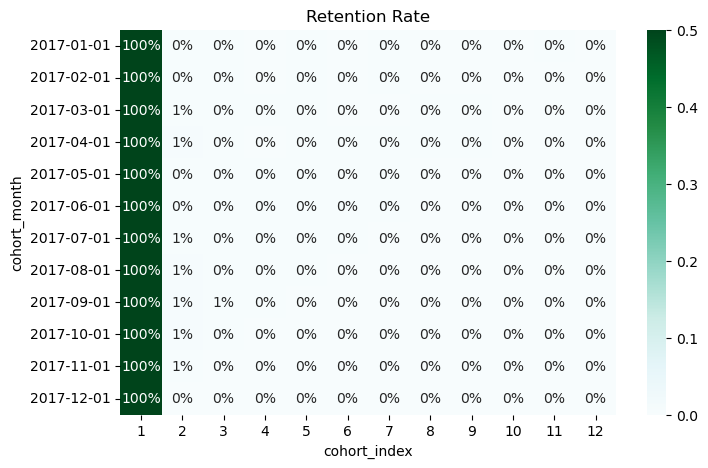

In [74]:
plt.figure(figsize=(8,5))
plt.title("Retention Rate")
sns.heatmap(data=retention,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="BuGn")
plt.show()

Мы видим, что самый высокий retention на 3 месяц наблюдается у пользователей, совершивших первую покупку сентябре 2017, и таких пользователей 4076. Сохраним их отдельно

In [75]:
september_2017_clients = orders_cohort.loc[orders_cohort.cohort_month == "2017-09-01"].customer_unique_id

__Ответ 5: В 2017 году, среди пользователей самый высокий retention на 3 месяц демонстриует группа, совершившая первую покупку в сентябре 2017. Таких пользователей 4076.__ 

***
__Вопрос 6: Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию__

Для выполнения данного задания сначала подготовим данные. Поскольку у нас нет датафрейма, который одновременно содержит данные о стоимости покупки, и информацию о дате заказа, а также о пользователе, то целесообразно объединить clients, orders и items, оставив там только нужные поля. Так как в этом задании речь не идет о покупке, можно анализировать абсолютно всех пользователей

В items предварительно выполним группировку по номеру заказа, чтобы получить итоговую сумму заказа. Как мы выяснили ранее, одна строка в items соответствует одной единице товара, поэтому при группировке можно использовать sum.

In [76]:
# save required data from orders and clients
orders_clients = orders[['customer_id', 'order_id', 'order_purchase_date']] \
                        .merge(clients[['customer_id','customer_unique_id']], on='customer_id')

In [77]:
# merge with items
clients_RFM = orders_clients.merge(
                            items.groupby(['order_id'], as_index=False).price.sum(), 
                            how='inner', on='order_id'
                                )
clients_RFM.head()

customer_id                          order_id  \
0  9ef432eb6251297304e76186b10a928d  e481f51cbdc54678b7cc49136f2d6af7   
1  b0830fb4747a6c6d20dea0b8c802d7ef  53cdb2fc8bc7dce0b6741e2150273451   
2  41ce2a54c0b03bf3443c3d931a367089  47770eb9100c2d0c44946d9cf07ec65d   
3  f88197465ea7920adcdbec7375364d82  949d5b44dbf5de918fe9c16f97b45f8a   
4  8ab97904e6daea8866dbdbc4fb7aad2c  ad21c59c0840e6cb83a9ceb5573f8159   

  order_purchase_date                customer_unique_id   price  
0 2017-10-02 10:56:33  7c396fd4830fd04220f754e42b4e5bff   29.99  
1 2018-07-24 20:41:37  af07308b275d755c9edb36a90c618231  118.70  
2 2018-08-08 08:38:49  3a653a41f6f9fc3d2a113cf8398680e8  159.90  
3 2017-11-18 19:28:06  7c142cf63193a1473d2e66489a9ae977   45.00  
4 2018-02-13 21:18:39  72632f0f9dd73dfee390c9b22eb56dd6   19.90

Далее рассчитаем для каждого показатели Recency, Frequency, Monetary. Поскольку данные в датафрейме представлены за предыдущие года, то для расчета Recency целесообразно выбрать самую позднюю дату из users_RFM

In [78]:
now = clients_RFM.order_purchase_date.max()
now

Timestamp('2018-09-03 09:06:57')

In [79]:
# find the last purchase for each user
recency_df = clients_RFM.groupby(by='customer_unique_id', as_index=False)['order_purchase_date'].max()
recency_df.columns = ['customer_unique_id','last_purshace_date']
recency_df.head()

customer_unique_id  last_purshace_date
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42

In [80]:
# calculate recency
recency_df['recency'] = recency_df['last_purshace_date'].apply(lambda x: (now - x).days)
recency_df.head()

customer_unique_id  last_purshace_date  recency
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27      115
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27      118
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03      541
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41      325
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42      292

In [81]:
# calculate frequency of purchases
frequency_df = clients_RFM.groupby(by=['customer_unique_id'], as_index=False)['order_id'].count()
frequency_df.columns = ['customer_unique_id','frequency']
frequency_df.head()

customer_unique_id  frequency
0  0000366f3b9a7992bf8c76cfdf3221e2          1
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1
2  0000f46a3911fa3c0805444483337064          1
3  0000f6ccb0745a6a4b88665a16c9f078          1
4  0004aac84e0df4da2b147fca70cf8255          1

In [82]:
# calculate monetary
monetary_df = clients_RFM.groupby(by='customer_unique_id',as_index=False).agg({'price': 'sum'})
monetary_df.columns = ['customer_unique_id','monetary']
monetary_df.head()

customer_unique_id  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2    129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f     18.90
2  0000f46a3911fa3c0805444483337064     69.00
3  0000f6ccb0745a6a4b88665a16c9f078     25.99
4  0004aac84e0df4da2b147fca70cf8255    180.00

In [83]:
# merge all dataframes
RFM_df = recency_df.merge(frequency_df, on='customer_unique_id')
RFM_df = RFM_df.merge(monetary_df, on='customer_unique_id')
RFM_df.head()

customer_unique_id  last_purshace_date  recency  frequency  \
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27      115          1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27      118          1   
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03      541          1   
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41      325          1   
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42      292          1   

   monetary  
0    129.90  
1     18.90  
2     69.00  
3     25.99  
4    180.00

Чтобы создать сегменты RFM-модели, посмотрим на распределение укальных значений RFM

In [84]:
RFM_df.shape

(95420, 5)

In [85]:
RFM_df.frequency.value_counts()

1     92507
2      2673
3       192
4        29
5         9
6         5
7         3
9         1
16        1
Name: frequency, dtype: int64

По частоте видно, что из 95420 пользователей большинство (примерно 97 %) оформляли 1 заказ. Некоторая категория пользователей (в районе 2%) оформляла 2 заказа. Остальные - меньше. Считаю, что целесообразно разбить пользователей относительно такого распределения

In [86]:
RFM_df.recency.value_counts()

282    1045
283     433
281     415
280     390
279     374
       ... 
603       3
728       2
717       1
700       1
0         1
Name: recency, Length: 614, dtype: int64

In [337]:
RFM_df.monetary.value_counts()

59.90      1610
69.90      1502
49.90      1341
89.90      1156
99.90      1135
           ... 
39.90         1
112.98        1
666.00        1
382.80        1
1570.00       1
Name: monetary, Length: 8619, dtype: int64

Суммы покупок, как и количество дней с последней покупки, достаточно различны, поэтому считаю, что в таком случае, можно придерживаться квантильного подхода, но с привязкой к реальности. Например, будем считать недавней покупку, которая была совершена в последнем месяце. По потраченным суммам попробуем следовать логике, удвоения/утроения порядка цены

In [369]:
RFM_df.recency.quantile(q=[0.075, 0.125, 0.25])

0.075     35.0
0.125     60.0
0.250    118.0
Name: recency, dtype: float64

In [379]:
RFM_df.monetary.quantile(q=[0.25, 0.9, 0.95, 0.99])

0.25      47.9000
0.90     284.0000
0.95     422.0000
0.99    1013.5934
Name: monetary, dtype: float64

Таким образом, разбиение будет следующим:

По frequency:
- 1 заказ 
- 2 заказа
- 3 и более заказа (их лучше удержать)

По recency:
- менее 35 дней дней назад (их лучше удержать)
- от 35 до 60 дней назад 
- от 60 до 118 дней назад
- более 118 дней 

По monetary:
- заказы на сумму менее 48
- заказы на сумму более 48, но до 284
- заказы на сумму от 284 до 422
- заказы на сумму от 422 до 1000 (их лучше удержать)
- заказы на сумму от 1000 (их лучше удержать)



Создадим вспомогательные функции, которые будут определять кластер по frequency, recency, monetary. Считаем, что высокие значения frequency и monetary - это хорошо. У recency наоборот низкие значения - хорошо. Определим кластеры и присвоим их каждому пользователю

In [87]:
def FScore(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    else:
        return 3

def RScore(x):
    if x > 118:
        return 1
    elif 60 < x <= 118:
        return 2
    elif  35 < x <= 60:
        return 3
    else:
        return 4

def MScore(x):
    if x <= 48:
        return 1
    elif 48 < x <= 284:
        return 2
    elif 284 < x <= 422:
        return 3
    elif 422 < x <= 1000:
        return 4
    else:
        return 5

Таким образом, в 345 у нас будут пользователи, которые покупали недавно, потратили много, и делают покупки постоянно. А в 111 - потерянные пользователи, которые купили 1 раз и на малую сумму

In [88]:
rfm_segmentation = RFM_df
rfm_segmentation['f_quartile'] = rfm_segmentation.frequency.apply(FScore)
rfm_segmentation['r_quartile'] = rfm_segmentation.recency.apply(RScore)
rfm_segmentation['m_quartile'] = rfm_segmentation.monetary.apply(MScore)

In [89]:
# combine all scores 
rfm_segmentation['RFM_score'] = rfm_segmentation.f_quartile.map(str) + \
                                rfm_segmentation.r_quartile.map(str) + \
                                rfm_segmentation.m_quartile.map(str)
rfm_segmentation.head()

customer_unique_id  last_purshace_date  recency  frequency  \
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27      115          1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27      118          1   
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03      541          1   
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41      325          1   
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42      292          1   

   monetary  f_quartile  r_quartile  m_quartile RFM_score  
0    129.90           1           2           2       122  
1     18.90           1           2           1       121  
2     69.00           1           1           2       112  
3     25.99           1           1           1       111  
4    180.00           1           1           2       112

Посчитаем количество поьльзователей в каждом из сегментов

In [90]:
rfm_segmentation.groupby('RFM_score', as_index=False).agg({'customer_unique_id': 'count'})

RFM_score  customer_unique_id
0        111               18008
1        112               44888
2        113                3332
3        114                2568
4        115                 660
5        121                2976
6        122                7371
7        123                 522
8        124                 464
9        125                 124
10       131                1197
11       132                3011
12       133                 192
13       134                 191
14       135                  57
15       141                1839
16       142                4509
17       143                 304
18       144                 228
19       145                  66
20       211                  79
21       212                1359
22       213                 275
23       214                 190
24       215                  37
25       221                  13
26       222                 256
27       223                  43
28       224                  46
29       225                  13
30       231                   6
31       232                 113
32       233                  28
33       234                  18
34       235                   2
35       241                   9
36       242                 140
37       243                  27
38       244                  18
39       245                   1
40       311                   4
41       312                  76
42       313                  27
43       314                  45
44       315                   6
45       322                  15
46       323                   8
47       324                  13
48       325                   5
49       332                   2
50       333                   2
51       334                   7
52       335                   1
53       342                  12
54       343                  10
55       344                   4
56       345                   3

Из представленных результатов видно, что кластеры, которые находятся "внизу" по RFM (малые значения по каждой из RFM оценок), насчитывают большое количество пользователей. При этом в кластерах, которых хочется удержать, пользователей сильно меньше.